# Computer Vision - P1

### **Carefully read the following instructions before start coding.**

==============================================================================================
## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments and answers need to be in **English**.

- The deliverable must be a file named **P1_Student1_Student2.zip** that includes:
    - The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): October, 3, 2023 23:00 h**

==============================================================================================

## Practicum 1: Basics on Image Processing and Manipulation
==============================================================================================

The main topics are:

1. Image loading, saving and creation

2. Color manipulation

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

==============================================================================================
### Packages loading

First we need to import the required Python packages for basic image manipulation.

Run the following code:

In [8]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

from skimage import color
from skimage import exposure
from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.color import rgba2rgb

In [9]:
from skimage import io, feature, filters # useful for image loading and saving, and for canny
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
from skimage.transform import resize
from skimage import img_as_float, img_as_ubyte # useful to avoid losing precision when saving rgb images
import numpy as np
from skimage.color import rgb2gray

# Auxiliar function
def visualize(original, segmentation, label):
    fig=plt.figure(figsize=(20,15))

    
    for i in range(len(segmentation)):
        fig.add_subplot(1,4,i+1)

        if(i != 0):
            plt.imshow(mark_boundaries(original, segmentation[i])) 
        else:
            plt.imshow(segmentation[i])
            
        plt.title(label[i])
        plt.xticks([])
        plt.yticks([])

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the
notebook**):

In [10]:
%matplotlib inline

==============================================================================================
### 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 150 rows and 300 columns where each value should be of type unsigned integer with 8 bits.

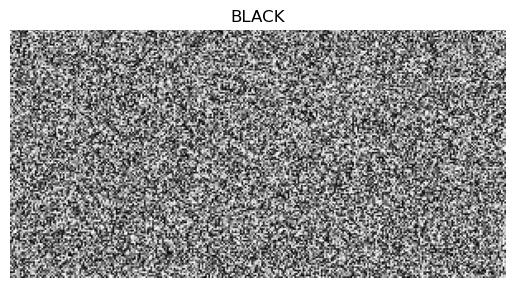

In [11]:
# Define the size of the image: 150 rows x 300 columns
size = (150, 300)

# Specify the data type for pixel values as 8-bit unsigned integers
typed = np.uint8

# Create an empty NumPy array to represent the image
imagen = np.random.randint(0, 256, size, typed)

# Display the image using Matplotlib
plt.imshow(imagen, 'gray')  # Display the image with a grayscale colormap
plt.title("BLACK")         # Set the title of the displayed image to "BLACK"
plt.axis('off')            # Remove the axis (ticks and labels)
plt.show()                 # Show the image

How many different values can each pixel have in this case?

This allows us to represent 2^8 = 256 values in each pixel.

b) Create and display a **RGB image** that has 200 rows and 200 columns where each value should be of type unsigned integer with 8 bits. Then, transform it to grayscale.:

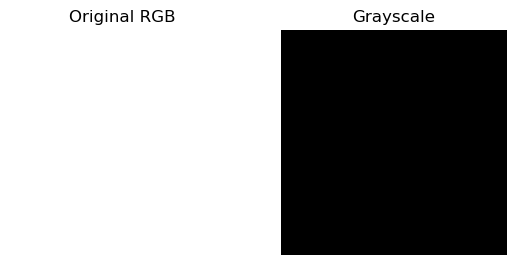

In [12]:
# Define the size of the image (rows x columns)
size = (200, 200)

# Create a 3-channel (RGB) image with unsigned 8-bit integers
image_rgb = np.zeros((size[0], size[1], 3), dtype=np.uint8)

# Fill the image with a color (e.g., white, which is [255, 255, 255] in RGB)
color = [255, 255, 255]
image_rgb[:, :] = color

# Convert the RGB image to grayscale by averaging the channels
image_gray = np.mean(image_rgb, axis=2, dtype=np.uint8)

# Display the original RGB image
plt.subplot(1, 2, 1)           # Create a subplot (1 row, 2 columns, first plot)
plt.imshow(image_rgb)          # Display the RGB image
plt.title("Original RGB")      # Set the title for this subplot
plt.axis('off')                # Remove the axis (ticks and labels)

# Display the grayscale image
plt.subplot(1, 2, 2)           # Create a subplot (1 row, 2 columns, second plot)
plt.imshow(image_gray, cmap='gray')  # Display the grayscale image with a grayscale colormap
plt.title("Grayscale")         # Set the title for this subplot
plt.axis('off')                # Remove the axis (ticks and labels)

plt.show()                     # Show the entire figure with both subplots


c) Change the color of the pixels of the image in section **a)** in such a way that the right half is white (255) and the left half is black (0).

Visualize the image and print the values of its first row.

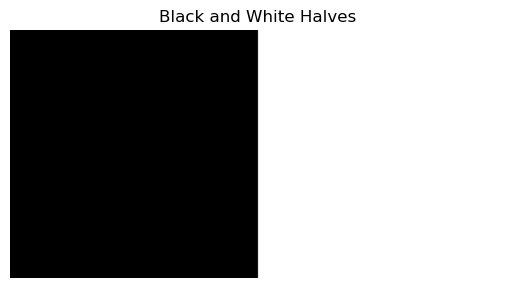

Values of the first row:
[[  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]


In [13]:
# Define the size of the image (rows x columns)
size = (150, 300)

# Create a 3-channel (RGB) image with unsigned 8-bit integers
image_rgb = np.zeros((size[0], size[1], 3), dtype=np.uint8)

# Define the width of the separation line between black and white halves
line_width = size[1] // 2

# Fill the left half of the image with black ([0, 0, 0] in RGB)
image_rgb[:, :line_width] = [0, 0, 0]

# Fill the right half of the image with white ([255, 255, 255] in RGB)
image_rgb[:, line_width:] = [255, 255, 255]

# Convert the RGB image to grayscale by averaging the channels
image_gray = np.mean(image_rgb, axis=2, dtype=np.uint8)

# Display the modified image
plt.imshow(image_rgb)
plt.title("Black and White Halves")
plt.axis('off')
plt.show()

# Print the values of the first row
print("Values of the first row:")
print(image_rgb[0])


d) Flip the image to create a mirror ilusion.

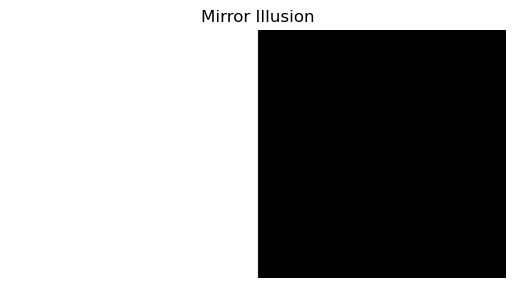

In [14]:
# Define the size of the image (rows x columns)
size = (150, 300)

# Create a 3-channel (RGB) image with unsigned 8-bit integers
image_rgb = np.zeros((size[0], size[1], 3), dtype=np.uint8)

# Define the width of the separation line between black and white halves
line_width = size[1] // 2

# Fill the left half of the image with black ([0, 0, 0] in RGB)
image_rgb[:, :line_width] = [0, 0, 0]

# Fill the right half of the image with white ([255, 255, 255] in RGB)
image_rgb[:, line_width:] = [255, 255, 255]

# Convert the RGB image to grayscale by averaging the channels
image_gray = np.mean(image_rgb, axis=2, dtype=np.uint8)

# Flip the image horizontally to create a mirror illusion
mirrored_image_rgb = np.fliplr(image_rgb)

# Display the mirrored image
plt.imshow(mirrored_image_rgb)
plt.title("Mirror Illusion")
plt.axis('off')
plt.show()


### 1.2 Image saving and loading

a) Use the IO image package to save the previously image:

In [15]:
#Save image 
io.imsave('images_notebook/imagen1.jpg', imagen)

b) Load the saved image and visualize it. Print the dimensions, the value of pixel (10,50) and data type in order to check everything is correct

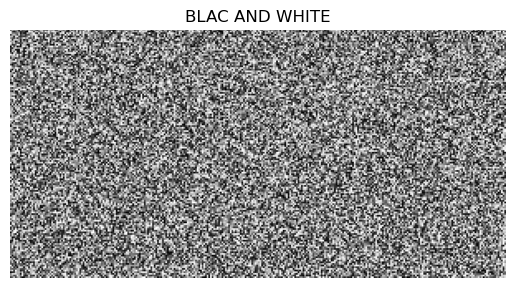

(150, 300)
96
uint8


In [16]:
#Read image
img = io.imread('images_notebook/imagen1.jpg')

#Show de image
plt.imshow(img, 'gray')#The colormap is GRAY
plt.title("BLAC AND WHITE")#Set title
plt.axis('off')#Delete the axis
plt.show()

print(img.shape)#Print the dimansion
print(img[20,30])#Print the value of the pixel (20, 30)
print(img.dtype)#Print the type

### 1.3 Color image manipulation

a) Load and show the image `images_notebook/dog.jpg`, and check its dimensions and data type.

**Note:** Pictures may appear in the figure with pseudocolors. What commands to use in order to display them in **RGB** color and in **grayscale**?!

In [17]:
# Function to display information about an image
def showDim(img):
    # Display the shape of the image (number of rows, number of columns, and channels if applicable)
    print("SHAPE: " + str(img.shape))
    
    # Display the data type of the image (e.g., uint8 for 8-bit unsigned integers)
    print("DTYPE: " + str(img.dtype))
    
    # Display the maximum pixel value in the image (brightness value)
    print("MAX VALUE: " + str(img.max()))
    
    # Display the minimum pixel value in the image (darkest value)
    print("MIN VALUE: " + str(img.min()))


In [18]:
# Function to display a list of images in a figure without axis
def viewFigure(images, titles):
    # Create a figure with a row of subplots, one for each image
    figure, x = plt.subplots(1, len(images))
    figure.set_size_inches(15, 15)
    
    # For each image in the list
    for i in range(len(images)):
        x[i].imshow(images[i])  # Set the image
        x[i].set_title(titles[i])  # Set the title
        x[i].axis('off')  # Turn off the axis
        
    # Show all the images in the figure
    plt.show()

# Function to display a list of images in a figure without axis and with contrast adjustment
def viewFigureContrast(images, titles):
    # Create a figure with a row of subplots, one for each image
    figure, x = plt.subplots(1, len(images))
    figure.set_size_inches(15, 15)
    
    # For each image in the list
    for i in range(len(images)):
        x[i].imshow(images[i], vmin=0, vmax=1)  # Set the image with contrast adjustment
        x[i].set_title(titles[i])  # Set the title
        x[i].axis('off')  # Turn off the axis
    
    # Show all the images in the figure
    plt.show()

# Function to display a list of images in a figure with axis and a grayscale colormap
def viewFigureAxis(images, titles):
    # Create a figure with a row of subplots, one for each image
    figure, x = plt.subplots(1, len(images))
    figure.set_size_inches(15, 15)
    
    # For each image in the list
    for i in range(len(images)):
        x[i].imshow(images[i], cmap='gray', vmin=0, vmax=1)  # Set the image with contrast adjustment and grayscale colormap
        x[i].set_title(titles[i])  # Set the title
        
    # Show all the images in the figure
    plt.show()


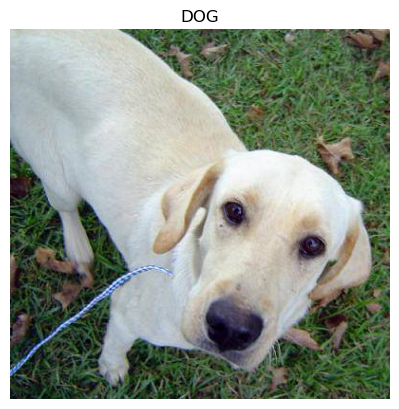

SHAPE: (390, 400, 3)
DTYPE: uint8
MAX VALUE: 255
MIN VALUE: 0


In [19]:
# Import necessary libraries
from skimage import io
import matplotlib.pyplot as plt

# Read the image named 'dog.jpg' from the specified file path
dog = io.imread('images_notebook/dog.jpg')

# Display the read image
plt.imshow(dog)            # Show the image
plt.title("DOG")           # Set the title of the displayed image
plt.axis('off')            # Remove the axis (ticks and labels)
plt.show()

# Display the dimensions, data type, maximum, and minimum values of the image
showDim(dog)


b) Convert the previous image to grayscale, and **save it**.

Moreover, plot the two images (RGB & greyscale) in a single figure, and show details such as shape, dtype, max and min values.

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


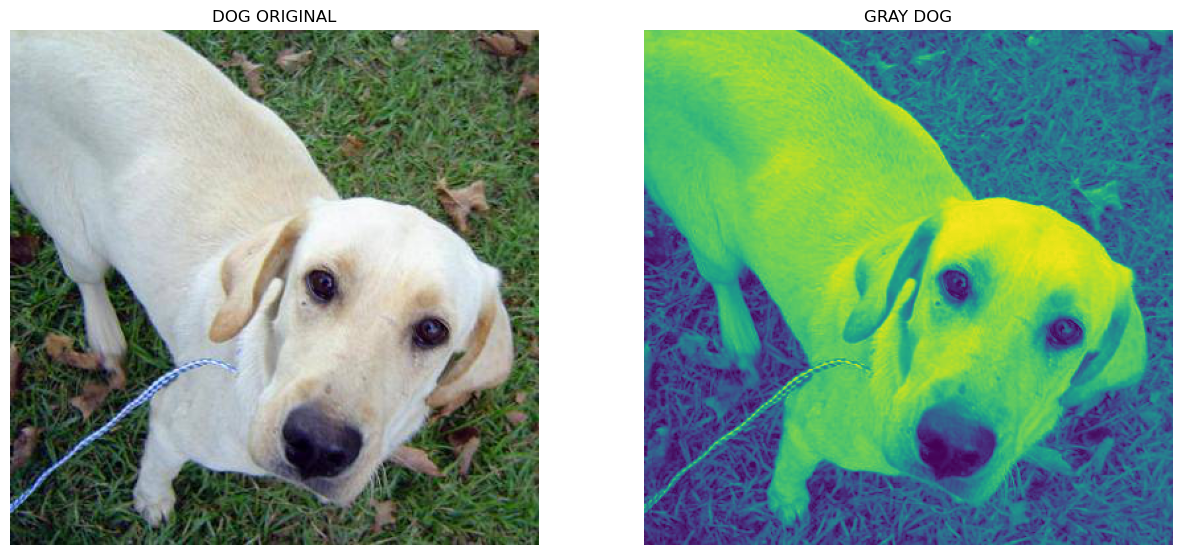

SHAPE: (390, 400)
DTYPE: float64
MAX VALUE: 0.9966666666666666
MIN VALUE: 0.0028054901960784316


In [20]:
# Import necessary libraries
from skimage import io, color
import matplotlib.pyplot as plt

# Read the original color image of a dog
dog = io.imread('images_notebook/dog.jpg')

# Convert the original color image to grayscale using rgb2gray function
grayDog = color.rgb2gray(dog)

# Save the grayscale image as 'dog_grayscale.jpg'
io.imsave('images_notebook/dog_grayscale.jpg', grayDog)

# Create a list of images (original color and grayscale)
images = [dog, grayDog]

# Create a list of titles for the images
titles = ["DOG ORIGINAL", "GRAY DOG"]

# Display the list of images with their respective titles
viewFigure(images, titles)

# Display the dimensions, data type, maximum, and minimum values of the grayscale image
showDim(grayDog)


c) Compute the mean of the previous grayscale image and use a logical operation to obtain a boolean image. Pixels greather than the mean value must be shown as white. Display the binary image.

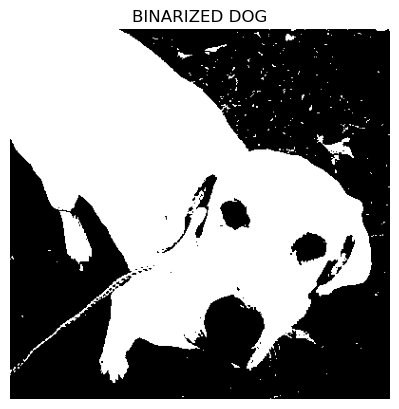

SHAPE: (390, 400)
DTYPE: uint8
MAX VALUE: 255
MIN VALUE: 0


In [21]:
# Import necessary libraries
from skimage import io
import matplotlib.pyplot as plt

# Read the grayscale image 'dog_grayscale.jpg'
binarizedDog = io.imread('images_notebook/dog_grayscale.jpg')

# Calculate the mean value of pixel intensities in the grayscale image
mean = binarizedDog.mean()

# Binarize the image: Pixels greater than the mean value are set to white (255), else black (0)
binarizedDog[binarizedDog < mean] = 0
binarizedDog[binarizedDog >= mean] = 255

# Display the binarized image in grayscale
plt.imshow(binarizedDog, cmap='gray')
plt.title("BINARIZED DOG")  # Set the title of the displayed image
plt.axis('off')  # Remove the axis (ticks and labels)
plt.show()

# Save the binarized image as 'dog_binarized.jpg'
io.imsave('images_notebook/dog_binarized.jpg', binarizedDog)

# Display the dimensions, data type, maximum, and minimum values of the binarized image
showDim(binarizedDog)


d) Visualize in the same figure all the three images: (1) the original image, (2) the gray image, and (3) the binarized image. Set the corresponding titles of the images and their descriptions

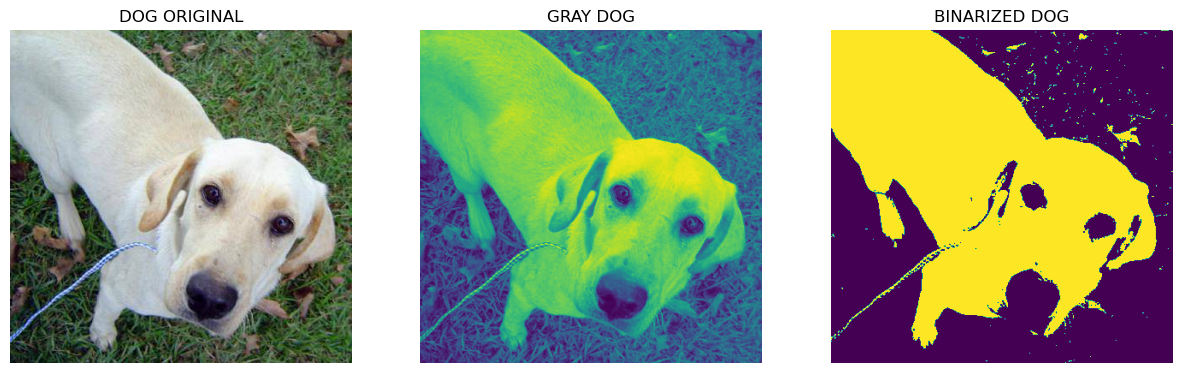

In [22]:
# Create a list of images (original color, grayscale, and binarized)
images = [dog, grayDog, binarizedDog]

# Create a list of titles for the images
titles = ["DOG ORIGINAL", "GRAY DOG", "BINARIZED DOG"]

# Display all the images in one figure using the viewFigure function
viewFigure(images, titles)


### 1.4 Images manipulation

a) Create an RGB black image, 10% larger than the dog image. Afterwards, embed the dog image in the center. Show the framed image.

**Note:** Be carefull with the number of channels.

**Note:** Print the original image shape and the new image size to check if the sizes of the second one are 10% larger then the first one.


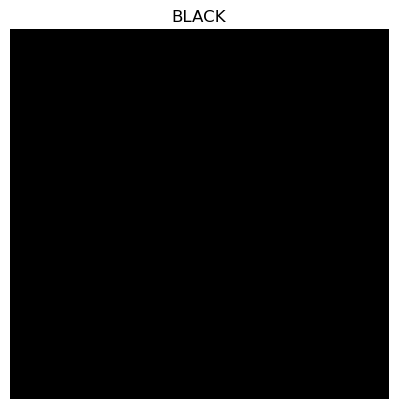

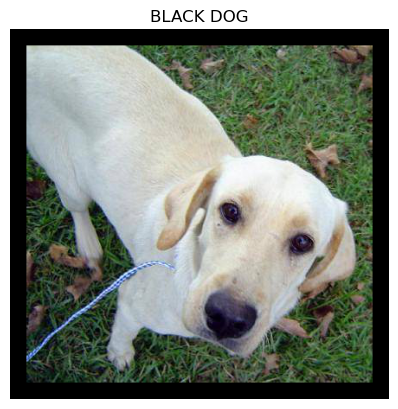

In [23]:
# Get the width and height of the 'dog' image
width = dog.shape[0]  # Width of the image
height = dog.shape[1]  # Height of the image

# Calculate the amount to increase the dimensions (10% increase)
increase = width // 10

# Calculate half of the increase for later use (5% increase)
increasePart = increase // 2

# Create a black image with increased dimensions
blackImageWidth = width + increase - 1  # New width of the image (-1 because it's not an exact number)
blackImageHeight = height + increase - 1  # New height of the image
blackImage = np.zeros((blackImageWidth, blackImageHeight, 3), np.uint8)

# Display the black image
plt.imshow(blackImage, cmap='gray')
plt.axis('off')  # Remove the axis (ticks and labels)
plt.title("BLACK")  # Set the title
plt.show()

# Create a copy of the black image for mixing with the 'dog' image
dogBlackImage = blackImage.copy()

# Mix the 'dog' image into the black image, leaving a border of black around it
dogBlackImage[increasePart:blackImageWidth - increasePart, increasePart:blackImageHeight - increasePart] = dog

# Display the mixed image
plt.imshow(dogBlackImage, cmap='gray')
plt.axis('off')  # Remove the axis (ticks and labels)
plt.title("BLACK DOG")  # Set the title
plt.show()

# Save the mixed image as 'dogBlackImage.jpg'
io.imsave('images_notebook/dogBlackImage.jpg', dogBlackImage)


b) Change the frame of the new image to green. Visualize the three images: original, black frame and green frame, in one single figure, with their respective titles.

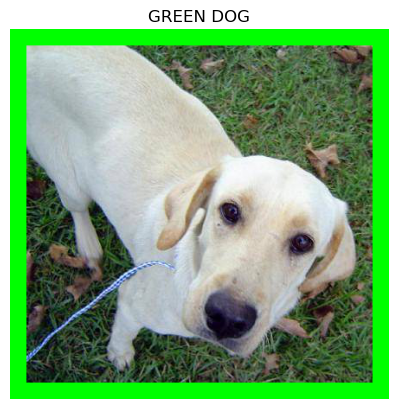

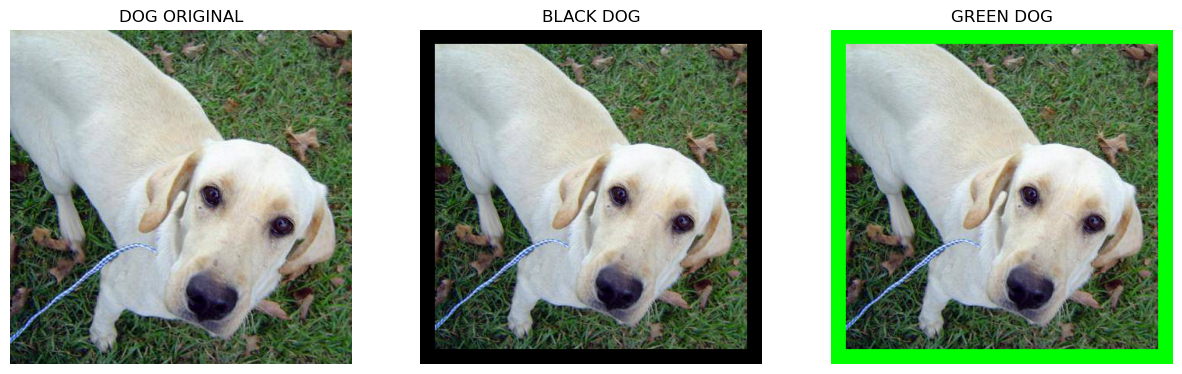

In [24]:
# Create a green image by copying the black image and changing the color to green
greenImage = blackImage.copy()
greenImage[:,:] = [0, 255, 0]  # Change the color to green [R=0, G=255, B=0]

# Create a copy of the green image for mixing with the 'dog' image
dogGreenImage = greenImage.copy()

# Mix the 'dog' image into the green image, leaving a border of green around it
dogGreenImage[increasePart:blackImageWidth - increasePart, increasePart:blackImageHeight - increasePart] = dog

# Display the mixed green dog image
plt.imshow(dogGreenImage, cmap='gray')
plt.axis('off')  # Remove the axis (ticks and labels)
plt.title("GREEN DOG")  # Set the title
plt.show()

# Save the mixed green dog image as 'DOGGreenImage.jpg'
io.imsave('images_notebook/DOGGreenImage.jpg', dogGreenImage)

# Create a list of images (original 'dog', black border 'dog', and green border 'dog')
images = [dog, dogBlackImage, dogGreenImage]

# Create a list of titles for the images
titles = ["DOG ORIGINAL", "BLACK DOG", "GREEN DOG"]

# Show all the images in one figure using the viewFigure function
viewFigure(images, titles)


### 1.5 Contrast enhancement

a) Open the image `images_notebook/car_lowContrast.jpg` and visualize it without graylevel enhancement. Print the image size, data type, minimum and maximum of the image.

**Note:** When running the function `imshow()` the image is authomatically enhanced. Use the `vmin` and `vmax` parameters in order to deactivate the enhancement applied by default. To this purpose, check the data type and used the maximum and minimum value corresponding to this type.


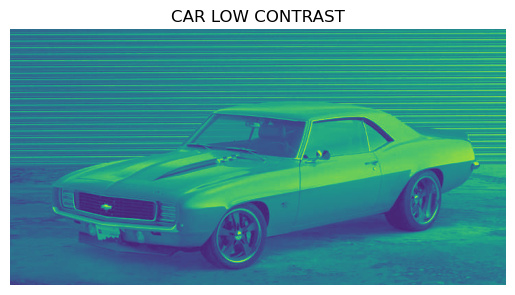

SHAPE: (371, 720)
DTYPE: uint8
MAX VALUE: 193
MIN VALUE: 63


In [25]:
# Import necessary libraries
from skimage import io
import matplotlib.pyplot as plt

# Read the image named 'car_lowContrast.jpg' from the specified file path
car_lowContrast = io.imread('images_notebook/car_lowContrast.jpg')

# Display the read image
plt.imshow(car_lowContrast)  # Show the image
plt.axis('off')  # Remove the axis (ticks and labels)
plt.title('CAR LOW CONTRAST')  # Set the title of the displayed image
plt.show()

# Display the dimensions, data type, maximum, and minimum values of the image
showDim(car_lowContrast)


b) Create an image called `dark_image` using the  values from the original one. Compute the minimum value of the image and substract this value of the original image. Print the new maximum a minimum values. Show the new image without graylevel enhancement.

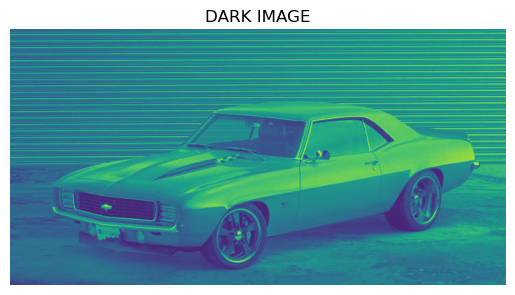

SHAPE: (371, 720)
DTYPE: float64
MAX VALUE: 130.0
MIN VALUE: 0.0


In [26]:
# Import necessary libraries
from skimage import exposure
import matplotlib.pyplot as plt

# Create a new image by rescaling the intensity of the 'car_lowContrast' image
# The rescaling sets the new intensity range to (0, maximum intensity difference)
dark_image = exposure.rescale_intensity(car_lowContrast, out_range=(0, car_lowContrast.max() - car_lowContrast.min()))

# Display the darkened image
plt.imshow(dark_image)  # Show the image
plt.axis('off')  # Remove the axis (ticks and labels)
plt.title('DARK IMAGE')  # Set the title of the displayed image
plt.show()

# Display the dimensions, data type, maximum, and minimum values of the darkened image
showDim(dark_image)


c) Similarly to the previous question, create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and show the new image without graylevel enhancement.


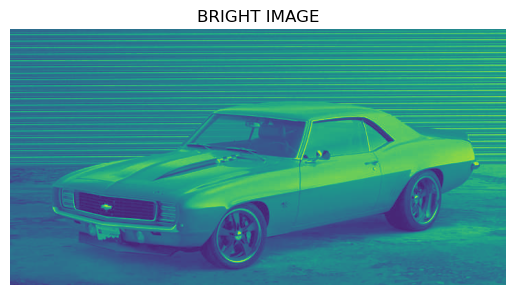

SHAPE: (371, 720)
DTYPE: float64
MAX VALUE: 385.0
MIN VALUE: 255.0


In [27]:
# Import necessary libraries
from skimage import exposure
import matplotlib.pyplot as plt

# Calculate the difference between the maximum and minimum pixel values in 'car_lowContrast'
difference = car_lowContrast.max() - car_lowContrast.min()

# Create a new image by rescaling the intensity of the 'car_lowContrast' image
# The rescaling sets the new intensity range to (255, 255 + difference)
bright_im = exposure.rescale_intensity(car_lowContrast, out_range=(255, 255 + difference))

# Display the brightened image
plt.imshow(bright_im)  # Show the image
plt.axis('off')  # Remove the axis (ticks and labels)
plt.title('BRIGHT IMAGE')  # Set the title of the displayed image
plt.show()

# Display the dimensions, data type, maximum, and minimum values of the brightened image
showDim(bright_im)


d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through scikit-image command [rescale_intensity](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.rescale_intensity). Check the minimal and maximal values of the enhanced image, and compare them with the previous one. Show the two images  without graylevel enhancement.

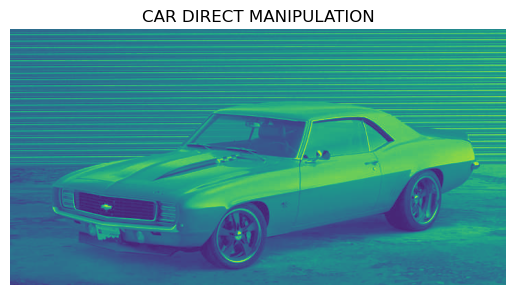

SHAPE: (371, 720)
DTYPE: float64
MAX VALUE: 255.0
MIN VALUE: 0.0


In [28]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Calculate the new image with contrast by directly manipulating the pixel values
# The formula scales the pixel values to the range [0, 255]
directManipulation = ((car_lowContrast - car_lowContrast.min()) / (car_lowContrast.max() - car_lowContrast.min())) * 255

# Display the image with direct manipulation for contrast adjustment
plt.imshow(directManipulation)  # Show the image
plt.axis('off')  # Remove the axis (ticks and labels)
plt.title('CAR DIRECT MANIPULATION')  # Set the title of the displayed image
plt.show()

# Display the dimensions, data type, maximum, and minimum values of the direct manipulation image
showDim(directManipulation)


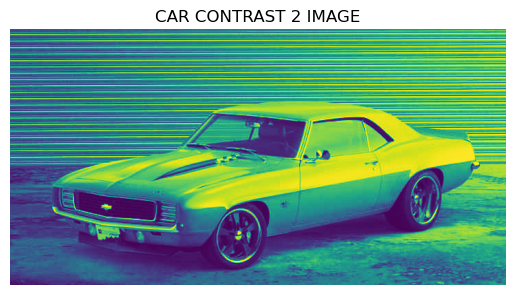

SHAPE: (371, 720)
DTYPE: float64
MAX VALUE: 255.0
MIN VALUE: 0.0009546271338724169


In [29]:
# Import necessary libraries
from skimage import exposure
import matplotlib.pyplot as plt

# Create a new image with contrast adjustment using scikit-image's equalize_hist function
# The pixel values are rescaled to the range [0, 255]
carScikit = exposure.equalize_hist(car_lowContrast) * 255

# Display the image with contrast adjustment using scikit-image
plt.imshow(carScikit)  # Show the image
plt.axis('off')  # Remove the axis (ticks and labels)
plt.title('CAR CONTRAST 2 IMAGE')  # Set the title of the displayed image
plt.show()

# Display the dimensions, data type, maximum, and minimum values of the contrast-adjusted image
showDim(carScikit)


e) Visualize the 5 images in the same figure, each one with its corresponding title.

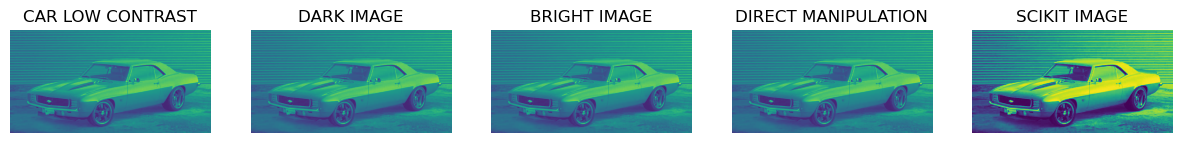

In [30]:
# Create a list of images (original low-contrast car image, darkened image, brightened image, directly manipulated image, scikit-image contrast-adjusted image)
images = [car_lowContrast, dark_image, bright_im, directManipulation, carScikit]

# Create a list of titles for the images
titles = ["CAR LOW CONTRAST", "DARK IMAGE", "BRIGHT IMAGE", "DIRECT MANIPULATION", "SCIKIT IMAGE"]

# Display all the images in one figure using the viewFigure function
viewFigure(images, titles)


### 1.6 Color manipulation

a) Read and visualize the image `images_notebook/Guell_Park.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/Guell_Park.jpg">

<img src="images_notebook/exchannels.png">

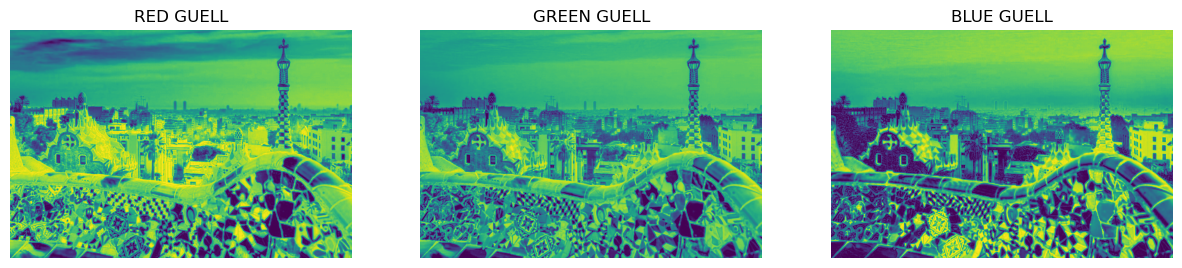

In [31]:
# Import necessary libraries
from skimage import io
import matplotlib.pyplot as plt

# Read the image 'Guell_Park.jpg' from the specified file path
chair = io.imread('images_notebook/Guell_Park.jpg')

# Extract the three channels (red, green, and blue) from the image
guellRed = chair[:, :, 0]
guellGreen = chair[:, :, 1]
guellBlue = chair[:, :, 2]

# Create a list of images for the individual color channels
images = [guellRed, guellGreen, guellBlue]

# Create a list of titles for the images
titles = ["RED GUELL", "GREEN GUELL", "BLUE GUELL"]

# Display the individual color channel images
viewFigure(images, titles)


b) Construct and visualize a new image, interchanging the red and green channels.

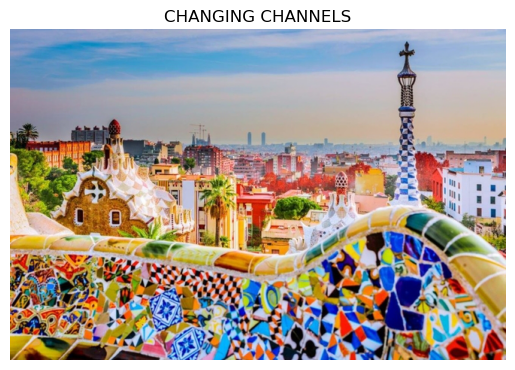

SHAPE: (440, 660, 3)
DTYPE: uint8
MAX VALUE: 255
MIN VALUE: 0


In [32]:
# Extract the red and green channels from the 'chair' image
guellRed = chair[:, :, 0]  # Red channel
guellGreen = chair[:, :, 1]  # Green channel

# Create a copy of the 'chair' image to change the color channels
chairChanels = chair.copy()

# Change the red channel in 'chairChanels' to the extracted green channel, and vice versa
chairChanels[:, :, 0] = guellRed
chairChanels[:, :, 1] = guellGreen

# Display the image with swapped color channels
plt.imshow(chairChanels, cmap='gray')  # Show the image
plt.axis('off')  # Remove the axis (ticks and labels)
plt.title('CHANGING CHANNELS')  # Set the title of the displayed image
plt.show()

# Display the dimensions, data type, maximum, and minimum values of the modified image
showDim(chairChanels)


c) Read and visualize the image images_notebook/donald_trump.jpg. Use the the bottom figure as an example to create a modern piece of art, extracting its three channels and embedding the image to a colored background.
<img src="images_notebook/art_trump.jpg" width="400">

Hint:extract the channel, fill with zeros the other 2 color channels. Using the alpha channel of the RGBA image, set those transparent to a solid color.
In the image above we used the background colors: (255,255,0), (48,213,200) and (128,0,128)

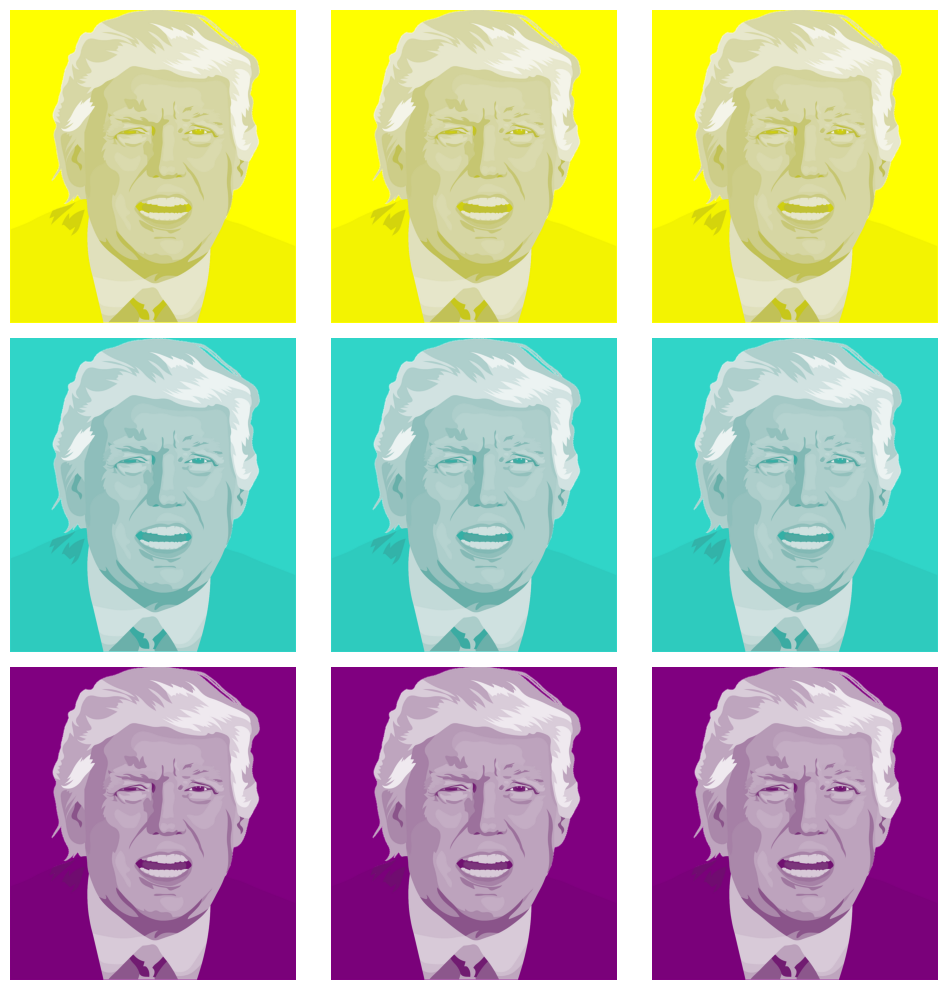

In [33]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = Image.open('images_notebook/donald_trump.png')

# Extract the red channel
r_channel, g_channel, b_channel, alpha_channel = image.split()

# Create colored backgrounds
background_colors = [(255, 255, 0), (48, 213, 200), (128, 0, 128)]

# Create a 3x3 grid of modern art pieces with different backgrounds
art_pieces = []

for background_color in background_colors:
    for _ in range(3):
        # Create a new image with the same size as the original, filled with the background color
        new_image = Image.new('RGBA', image.size, background_color)
        
        # Paste the red channel onto the new image
        new_image.paste(r_channel, (0, 0), r_channel)
        
        art_pieces.append(new_image)

# Create a 3x3 grid for displaying the modern art pieces
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(art_pieces[i]))  # Convert PIL image to numpy array and display
    ax.axis('off')  # Remove the axis (ticks and labels)

plt.tight_layout()
plt.show()


### 1.7 Masks and logical image manipulation

a) Read the image `images_notebook/circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

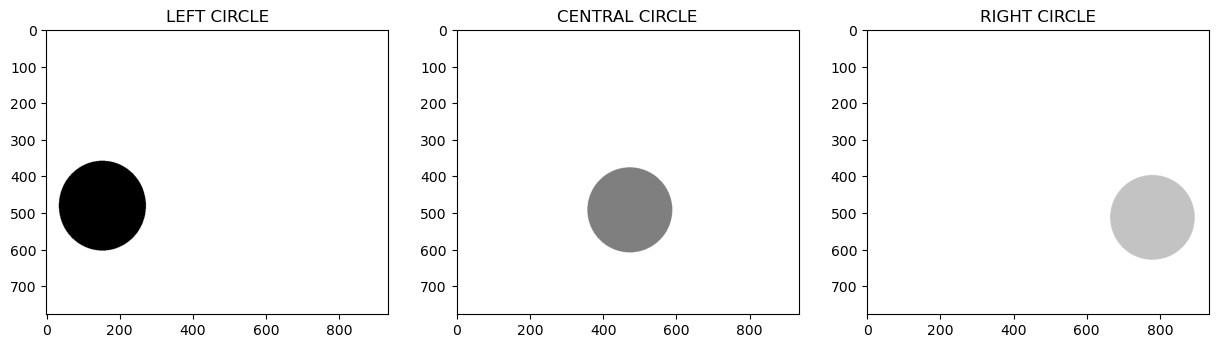

In [34]:
# Import necessary libraries
from skimage import io
import matplotlib.pyplot as plt

# Read the 'circles.bmp' image
circles = io.imread('images_notebook/circles.bmp')

# Create three copies of the image
circleLeft, circleCentral, circleRight = circles.copy(), circles.copy(), circles.copy()

# Modify each copy to isolate different parts of the image
circleLeft[circleLeft != 0] = 255  # Set non-zero pixels to white
circleCentral[circleCentral != 127] = 255  # Set pixels with intensity 127 to white
circleRight[circleRight != 195] = 255  # Set pixels with intensity 195 to white

# Create a list of images representing the isolated circles
images = [circleLeft, circleCentral, circleRight]

# Create a list of titles for the images
titles = ["LEFT CIRCLE", "CENTRAL CIRCLE", "RIGHT CIRCLE"]

# Display the images with titles and axes using the viewFigureAxis function
viewFigureAxis(images, titles)


b) Given the images `images_notebook/coat.png` and `images_notebook/model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying [resize, rotate, etc...](https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html) keep track how the image type and values range change. When necessary, apply type conversion using [img_as_float, img_as_uint, img_as_ubyte.](https://scikit-image.org/docs/stable/api/skimage.html)

**Note: DO NOT USE LOOPS to overlap the images!! It will be penalized.**


In [37]:
import skimage.transform as transform

#Read the three images
coat = io.imread('images_notebook/coat.png')
model = io.imread('images_notebook/model.png')
texture = io.imread('images_notebook/texture.png')

#Copy the model
model1 = model.copy()

#Mix the model and the coat
model1[coat != 0] = coat[coat != 0]

#Copy the model and the coat
model2 = model.copy()
coat2 = coat.copy()

model2 = img_as_ubyte(rgba2rgb(model2))
coat2 = img_as_ubyte(rgba2rgb(coat2))

#Mix the model with the coat with new texture
model2[coat2 != 0] = texture[coat2 != 0]

#List of images
images = [coat, model, model1, model2]
#List of titles
titles = ["COAT", "MODEL", "COAT MODEL", "COAT TEXTURE"]

#Show the images
viewFigure(images, titles)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 582 but corresponding boolean dimension is 1188